In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [4]:
# CSV 파일 불러오기
df = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/실습데이터.csv') 

In [6]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/raw_total_data.csv')

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0        2022-05-02 06:32:33
1        2022-05-02 06:32:34
2        2022-05-02 06:32:35
3        2022-05-02 06:32:36
4        2022-05-02 06:32:37
                 ...        
579292   2022-05-14 04:34:32
579293   2022-05-14 04:34:33
579294   2022-05-14 04:34:39
579295   2022-05-14 04:34:40
579296   2022-05-14 04:34:46
Name: Timestamp, Length: 579297, dtype: datetime64[ns]

In [12]:
df['inefficiency_main_motor'] = abs(df['MAIN_MOTOR_SET_FREQ.xlsx'] - df['MAIN_MOTOR_CURR.xlsx'])

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date

daily_inefficiency = df.groupby('date')['inefficiency_main_motor'].mean().reset_index()
daily_output = df.groupby('date')['OUTPUT_COUNT_DAY_1.xlsx'].sum().reset_index()

daily_data = pd.merge(daily_output, daily_inefficiency, on='date')

# 2.2 전류 비효율과 생산량 사이의 관계

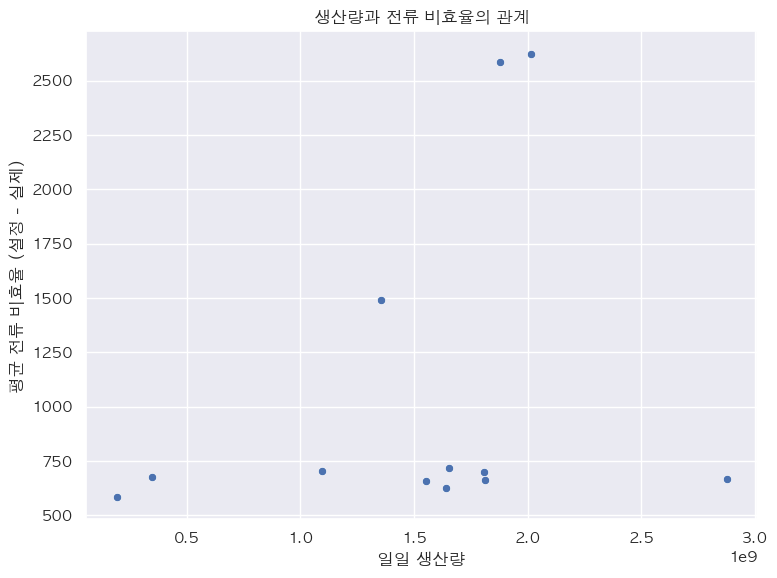

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily_data,
                x='OUTPUT_COUNT_DAY_1.xlsx',
                y='inefficiency_main_motor')
plt.xlabel('일일 생산량')
plt.ylabel('평균 전류 비효율 (설정 - 실제)')
plt.title('생산량과 전류 비효율의 관계')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
corr = daily_data['OUTPUT_COUNT_DAY_1.xlsx'].corr(daily_data['inefficiency_main_motor'])
print(f"상관계수: {corr:.4f}")

상관계수: 0.2679


In [26]:
print(df.columns.tolist())

['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'KO6_MOTOR_SET_FREQ.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'TRANS_POS_LEFT_SET_H.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx', 'KO6_MOTOR_CURR.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TRANS_POS_UP.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_L

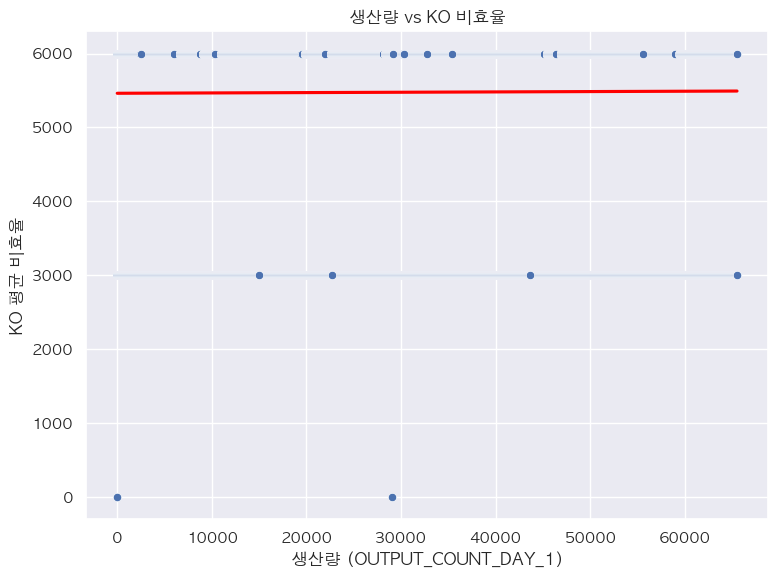

📊 생산량과 KO 비효율 간 상관계수: 0.008
⚠️ 생산량이 많을수록 KO 계열의 비효율이 증가하는 경향이 있습니다.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 비효율 계산
#1) 모터 설정 주파수
ko_freq_cols = [
    'KO1_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx',
    'KO4_MOTOR_SET_FREQ.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_SET_FREQ.xlsx'
]
#2) 실제 모터 전류값
ko_curr_cols = [
    'KO1_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO3_MOTOR_CURR.xlsx',
    'KO4_MOTOR_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO6_MOTOR_CURR.xlsx'
]

# 비효율 열 생성
for freq_col, curr_col in zip(ko_freq_cols, ko_curr_cols):
    df[f'ineff_{freq_col}'] = (df[freq_col] - df[curr_col]).abs()

# 평균 비효율 계산
df['inefficiency_KO_mean'] = df[[f'ineff_{col}' for col in ko_freq_cols]].mean(axis=1)

# 2. 생산량과 비효율 상관관계 분석
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='OUTPUT_COUNT_DAY_1.xlsx', y='inefficiency_KO_mean')
sns.regplot(data=df, x='OUTPUT_COUNT_DAY_1.xlsx', y='inefficiency_KO_mean', scatter=False, color='red')
plt.title('생산량 vs KO 비효율')
plt.xlabel('생산량 (OUTPUT_COUNT_DAY_1)')
plt.ylabel('KO 평균 비효율')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 상관계수 출력
corr_value = df['OUTPUT_COUNT_DAY_1.xlsx'].corr(df['inefficiency_KO_mean'])
print(f"📊 생산량과 KO 비효율 간 상관계수: {corr_value:.3f}")

if corr_value < 0:
    print("✅ 생산량이 많을수록 KO 계열의 비효율이 줄어드는 경향이 있습니다.")
elif corr_value > 0:
    print("⚠️ 생산량이 많을수록 KO 계열의 비효율이 증가하는 경향이 있습니다.")
else:
    print("➖ 두 변수 간 뚜렷한 상관관계는 없어 보입니다.")

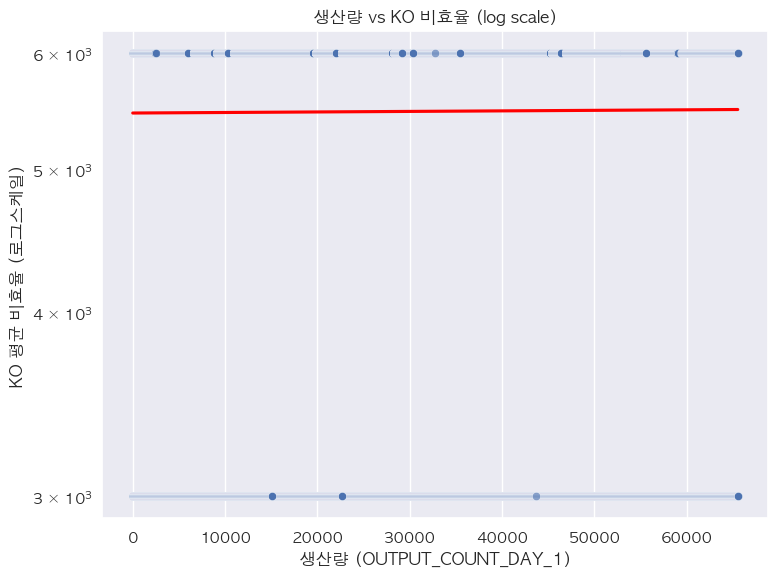

📊 생산량과 KO 비효율 간 상관계수: 0.008
⚠️ 생산량이 많을수록 KO 계열의 비효율이 증가하는 경향이 있습니다.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 비효율 계산
ko_freq_cols = [
    'KO1_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx',
    'KO4_MOTOR_SET_FREQ.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_SET_FREQ.xlsx'
]

ko_curr_cols = [
    'KO1_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO3_MOTOR_CURR.xlsx',
    'KO4_MOTOR_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO6_MOTOR_CURR.xlsx'
]

# 비효율 열 생성
for freq_col, curr_col in zip(ko_freq_cols, ko_curr_cols):
    df[f'ineff_{freq_col}'] = (df[freq_col] - df[curr_col]).abs()

# 평균 비효율 계산
df['inefficiency_KO_mean'] = df[[f'ineff_{col}' for col in ko_freq_cols]].mean(axis=1)

# 2. 생산량과 비효율 상관관계 분석
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='OUTPUT_COUNT_DAY_1.xlsx', y='inefficiency_KO_mean', alpha=0.6)
sns.regplot(data=df, x='OUTPUT_COUNT_DAY_1.xlsx', y='inefficiency_KO_mean',
            scatter=False, color='red')
plt.yscale('log')  # 또는 plt.xscale('log') 도 가능
plt.title('생산량 vs KO 비효율 (log scale)')
plt.xlabel('생산량 (OUTPUT_COUNT_DAY_1)')
plt.ylabel('KO 평균 비효율 (로그스케일)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 상관계수 출력
corr_value = df['OUTPUT_COUNT_DAY_1.xlsx'].corr(df['inefficiency_KO_mean'])
print(f"📊 생산량과 KO 비효율 간 상관계수: {corr_value:.3f}")

if corr_value < 0:
    print("✅ 생산량이 많을수록 KO 계열의 비효율이 줄어드는 경향이 있습니다.")
elif corr_value > 0:
    print("⚠️ 생산량이 많을수록 KO 계열의 비효율이 증가하는 경향이 있습니다.")
else:
    print("➖ 두 변수 간 뚜렷한 상관관계는 없어 보입니다.")

In [35]:
for ko, (set_col, curr_col) in ko_motor_pairs.items():
    print(f"{ko} 설정값 고유값: ", df[set_col].unique())
    print(f"{ko} 전류값 고유값: ", df[curr_col].unique())
    print("-----")

KO1 설정값 고유값:  [3000.    0. 6000.]
KO1 전류값 고유값:  [0.]
-----
KO2 설정값 고유값:  [3000.    0. 6000.]
KO2 전류값 고유값:  [0.]
-----
KO3 설정값 고유값:  [3000.    0. 6000.]
KO3 전류값 고유값:  [0.]
-----
KO4 설정값 고유값:  [3000.    0. 6000.]
KO4 전류값 고유값:  [0.]
-----
KO5 설정값 고유값:  [3000.    0. 6000.]
KO5 전류값 고유값:  [0.]
-----
KO6 설정값 고유값:  [3000.    0. 6000.]
KO6 전류값 고유값:  [0.]
-----


In [33]:
import pandas as pd

# KO 모터 설정값과 실제값 컬럼 쌍 정의
ko_motor_pairs = {
    'KO1': ('KO1_MOTOR_SET_FREQ.xlsx', 'KO1_MOTOR_CURR.xlsx'),
    'KO2': ('KO2_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_CURR.xlsx'),
    'KO3': ('KO3_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_CURR.xlsx'),
    'KO4': ('KO4_MOTOR_SET_FREQ.xlsx', 'KO4_MOTOR_CURR.xlsx'),
    'KO5': ('KO5_MOTOR_SET_FREQ.xlsx', 'KO5_MOTOR_CURR.xlsx'),
    'KO6': ('KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx'),
}

# 새로운 데이터프레임 구성
diff_data = {
    'date': df['date']
}

# 각 KO별로 diff 계산하여 diff_data에 추가
for ko, (set_col, curr_col) in ko_motor_pairs.items():
    diff_data[f'{ko}_diff'] = (df[set_col] - df[curr_col]).abs()

# 데이터프레임 생성
df_ko_diff = pd.DataFrame(diff_data)

# 결과 미리보기
print(df_ko_diff.head())

         date  KO1_diff  KO2_diff  KO3_diff  KO4_diff  KO5_diff  KO6_diff
0  2022-05-02    3000.0    3000.0    3000.0    3000.0    3000.0    3000.0
1  2022-05-02    3000.0    3000.0    3000.0    3000.0    3000.0    3000.0
2  2022-05-02    3000.0    3000.0    3000.0    3000.0    3000.0    3000.0
3  2022-05-02    3000.0    3000.0    3000.0    3000.0    3000.0    3000.0
4  2022-05-02    3000.0    3000.0    3000.0    3000.0    3000.0    3000.0


모든 KO 전류값(KO#_MOTOR_CURR)이 **0**입니다.

설정값(KO#_MOTOR_SET_FREQ)은 [0, 3000, 6000] 중 하나로 구성되어 있음.

이 상태에서 (설정값 - 전류값) 차이는 항상 설정값 그대로 나오므로,
→ diff = 설정값 - 0 = 설정값 → 결과가 전부 3000, 6000, 0만 반복됩니다.

✅ 해석
이 데이터에서는 KO 계열 모터의 전류값이 전부 0이라는 점에서 다음 가능성들을 생각해볼 수 있습니다:

1. 실제로 설비가 멈춰 있었거나, 해당 센서가 꺼져 있었음
데이터 수집 시점에 모터가 작동하지 않았거나,

전류센서에 문제가 있었을 가능성.

2. 센서값이 기록되지 않았거나, 컬럼 매핑이 잘못되었을 수 있음
전류값이 누락되었거나,

*_CURR에 전류가 아닌 잘못된 데이터가 들어갔을 수도 있습니다.

=> 무의미